## Drone Airspace Coding Challenge
* Given a square airspace, 128km x 128km, and N=10,000 drones occupying the airspace our challenge is to efficiently compute how many drones are flying too close to one  another. 
* Drone positions will be provided as an Nx2 array of [x,y] coordinates (in meters).
* Drones must maintain a horizontal separation of radius 0.5km from other drones. 
* If a drone is within 0.5km of another drone, both are "in conflict".
* Have count_conflicts return the total number of drones that are in a conflicted state. Not the total number of conflicts.
* Some common libraries can be imported, but not all, so relying on niche algorithms won't work. 
* This is very solvable with standard python libraries, several ways. 
* Coding style, readability, scalability, and documentation all matter! Consider the computational complexity of your solution. 
The N^2 answer can be coded up in 5 minutes and # 10 lines; we'd like to see something better!

In [3]:
import matplotlib as plt
import numpy as np
import math
%matplotlib inline

In [5]:
import random
random.seed(1)  # Setting random number generator seed for repeatability


In [47]:
NUM_DRONES = 500
AIRSPACE_SIZE = 128000 # 128 km
CONFLICT_RADIUS = 5000  # Meters.

In [29]:
def count_conflicts(drones, conflict_radius):

    conflicts = []
    
    # should do this in a single nested loop ???
    for first in range(len(drones)):
            for second in range(len(drones)):

                if first != second: #so 1vs1,2vs2 etc doesnt compute, 1 vs 3 and 3 vs 1 still computes???? make a unique set?
                    
                    #how to create a unique set of pair values so dont waste time running samee 3,1 and 1,3????
                    #banged my head with this one
                    #
    
                    if (abs(drones[first,0]-drones[second,0]) <= conflict_radius) and (abs(drones[first,1]-drones[second,1]) <= conflict_radius): 
                    #if x and y greater than 500 can skip these points
                    #think the checking and reduction of points is quicker than computing all Euclid distances
                        distance = math.hypot(drones[first,0]-drones[second,0],drones[first,1]-drones[second,1])
                        if distance <= conflict_radius: #now checking the actual Euclidean distance is less than the conflict_radius
                            conflicts.append(first)#all instances of conflicts
                
    return  len(set(conflicts))/2 #return 1,5 and 5,1 x,y and y,x so divide by 2 for answer


In [48]:
def gen_coord():
    return int(random.random() * AIRSPACE_SIZE)

In [49]:
positions = [[gen_coord(), gen_coord()] for i in range(NUM_DRONES)]
new_positions = np.asarray(positions) # conver to a numpy array for easy plotting I think
conflicts = count_conflicts(new_positions, CONFLICT_RADIUS)
print("Drones in conflict: {}".format(conflicts))

Drones in conflict: 442


## Wanted to visualise problem with smaller datasets

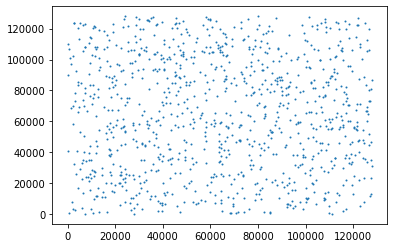

In [44]:
plt.pyplot.scatter(new_positions[:,0],new_positions[:,1],s=1)

## First atempt

def distances(posts):#calculate distance of every drone to every other drone
    
    conflicts = []
    
    for first in range(len(positions)):
            for second in range(len(positions)):

                if first != second: #so 1vs1,2vs2 etc doesnt compute, 1 vs 3 and 3 vs 1 still computes
                    
                    distance = math.hypot(posts[first,0]-posts[second,0],posts[first,1]-posts[second,1])
                    #print(distance)
                    if distance <= 500:
                        conflicts.append([first,second,distance])
                        
    return conflicts

In [50]:
def count_conflicts_2(drones, conflict_radius):
    import functools
    import operator
    conflicts = []
    conflicts_2 = [] #concatenated list to check for unique drone instances
    data = []
    
    for first in range(len(drones)):
            for second in range(len(drones)):

                if first != second: #so 1vs1,2vs2 etc doesnt compute, 1 vs 3 and 3 vs 1 still computes???? make a unique set?
                    
                    #how to create a unique set of pair values so dont waste time ????
    
                    if (abs(drones[first,0]-drones[second,0]) <= conflict_radius) and (abs(drones[first,1]-drones[second,1]) <= conflict_radius): 
                    #if x and y greater than 500 can skip these points#think the reduction of points is quicker than computing all Euclid distances
                        distance = math.hypot(drones[first,0]-drones[second,0],drones[first,1]-drones[second,1])
                        if distance <= conflict_radius: #now checking the actual Euclidean distance
                            conflicts.append([first,second])#little redu
                            conflicts_2.append(first)
                            data.append([first, second, distance])
                            #checking if I didnt need to add both since the nested for lopp covers both possibilities
    
    print(len(set(conflicts_2)))
    return  len(set(functools.reduce(operator.iconcat, conflicts, []))), data


In [51]:
count_conflicts_2(new_positions, CONFLICT_RADIUS)

442


(442,
 [[0, 221, 1563.1036433966876],
  [0, 227, 4572.677989974803],
  [0, 298, 1493.4523762075576],
  [0, 321, 3328.0914951365144],
  [1, 133, 3857.4447500904016],
  [1, 427, 4410.500425121848],
  [3, 80, 2136.8710770657176],
  [3, 104, 3277.268679861326],
  [3, 217, 4063.064483859443],
  [3, 362, 4830.920616197289],
  [3, 428, 3088.1920277081213],
  [4, 122, 3574.2708347297917],
  [4, 275, 2444.029459724248],
  [5, 162, 1985.664876055373],
  [5, 283, 1490.40162372429],
  [5, 496, 4784.6765825915545],
  [6, 62, 4314.444807851874],
  [6, 284, 3090.928177748555],
  [7, 265, 1014.0833299093325],
  [8, 78, 3139.449792559199],
  [8, 219, 4629.298434968305],
  [9, 88, 4604.294191295773],
  [9, 300, 3580.185749371113],
  [10, 54, 4955.351248902544],
  [10, 210, 4890.33219730521],
  [11, 42, 4414.756731689754],
  [11, 444, 2777.046632665717],
  [12, 28, 3848.5064635518024],
  [12, 98, 4059.717847338655],
  [13, 180, 2929.7061286074413],
  [13, 291, 4793.035468260171],
  [13, 374, 4916.1110646

In [1]:
128000/500

256.0

In [72]:
test = []
for i in range(1,11):
    for k in range(1,11):
        if i!=k:
            for j in range(len(test)):
                print(i,k,j)
                alt = []
                alt = [test[j][1],test[j][0]]
                print(alt)
                if test[j] != alt:
                    test.append([i,k])
            

1

In [71]:
test

[]